# Maximal Mask Area

__Imports__

In [37]:
from os import listdir
from os.path import join

import cv2
import numpy as np
from tqdm import tqdm
from scipy.ndimage import imread
from imageutils import imshow

__Constants__

In [ ]:
TRAIN_PATH       = join('..', 'data', 'raw', 'train')
#TRAIN_IMGS_PATH = join(TRAIN_PATH, 'imgs')
TRAIN_MASKS_PATH = join(TRAIN_PATH, 'masks')
#IMG_EXT         = 'jpg'
MASK_EXT         = 'gif'

In [5]:
masks = {f[:-9] : join(TRAIN_MASKS_PATH, f) for f in listdir(TRAIN_MASKS_PATH) if f.endswith("gif")}

In [33]:
x_min = 1280
y_min = 1918
x_max = 0
y_max = 0

In [72]:
for name, mask_path in tqdm(masks.items()):
    mask = ndimage.imread(mask_path, mode='L')
    pos = np.where( mask == 255 )
    x_min = np.min([x_min, np.min(pos[0])])
    y_min = np.min([y_min, np.min(pos[1])])
    x_max = np.max([x_max, np.max(pos[0])])
    y_max = np.max([y_max, np.max(pos[1])])
    #print('x_min: %d, x_max: %d, y_min: %d, y_max: %d' % (np.min(pos[0]), np.max(pos[0]), np.min(pos[1]), np.max(pos[1])))
    #break
print('x_min: %d, x_max: %d, y_min: %d, y_max: %d' % (x_min, x_max, y_min, y_max))

100%|██████████| 5088/5088 [03:05<00:00, 27.42it/s]

x_min: 81, x_max: 1192, y_min: 0, y_max: 1917


In [73]:
preview = np.zeros((*mask.shape, 3), dtype=np.uint8)
preview[x_min:x_max, y_min:y_max, 0] = 255

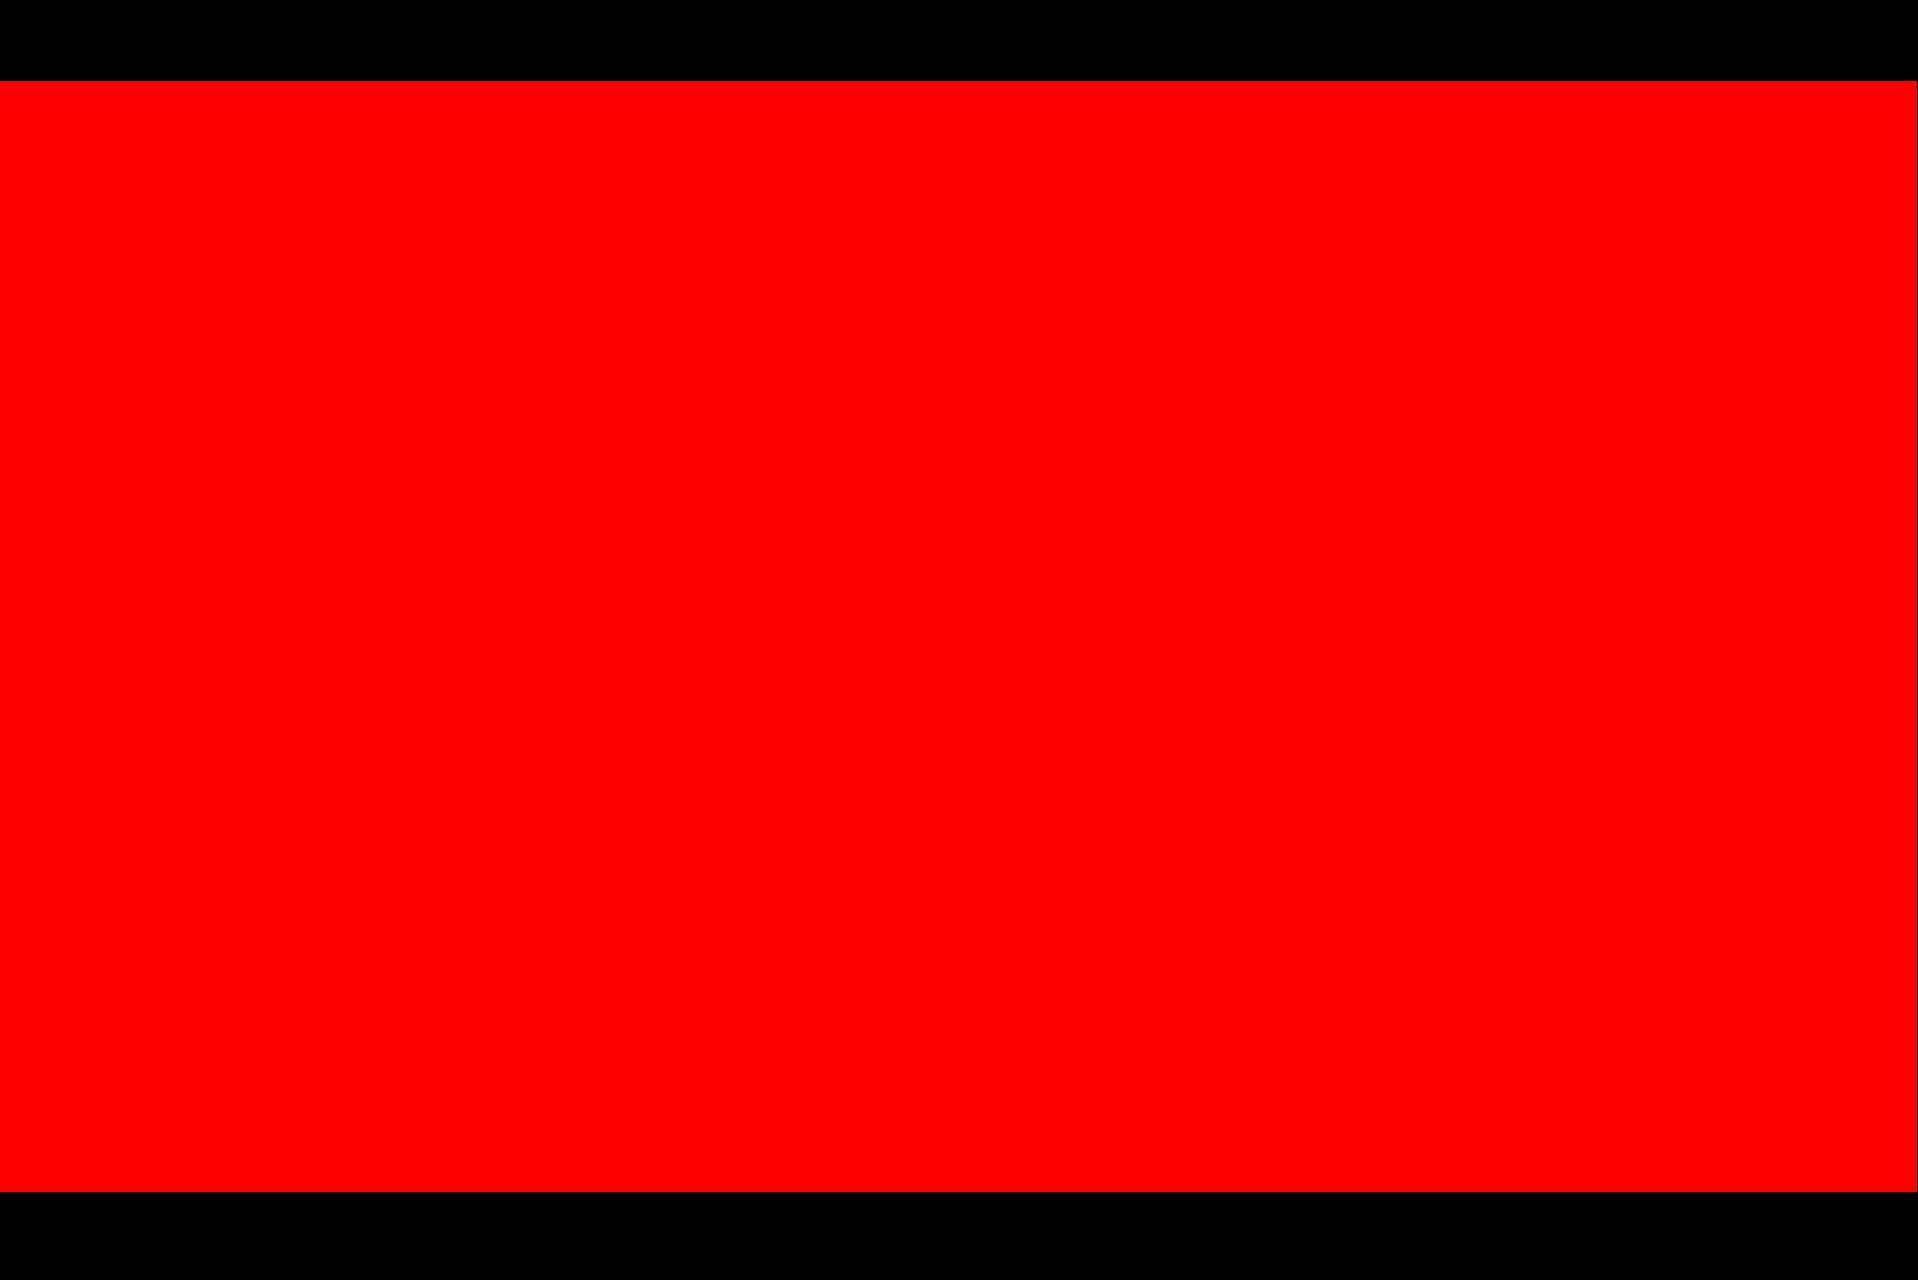

In [74]:
imshow(preview)